# Porter_Delivery_Time_Estimation Case Study

---

In [2]:
# importing libraries
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the csv file
df = pd.read_csv('Porter_Time_Estimation.csv')

In [4]:
# overview of the dataframe
df.sample(3)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
16462,2.0,2015-02-01 19:39:37,2015-02-01 20:51:07,b8b9c74ac526fffbeb2d39ab038d1cd7,cafe,4.0,2,640,2,245,325,52.0,53.0,72.0
185784,4.0,2015-02-13 02:14:50,2015-02-13 03:10:05,1679091c5a880faf6fb5e6087eb1b2dc,dessert,5.0,3,3040,3,750,1195,107.0,104.0,183.0
132440,1.0,2015-01-23 03:06:10,2015-01-23 03:48:19,7bd28f15a49d5e5848d6ec70e584e625,mediterranean,3.0,2,2525,2,1175,1250,53.0,61.0,75.0


## Define Problem
Porter is India's Largest Marketplace for Intra-City Logistics. Porter works with a wide range of restaurants to deliver their items directly to the people. In this case study focuses on estimating delivery times for Porter. The goal is to analyze order and delivery data to predict the estimated delivery time.

## 1. Exploratory Data Analysis

###  Observations on shape of data and data types of all attributes.

In [5]:
# checking the shape of the datafeame
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 197428
Number of columns : 14


In [6]:
# checking data types of all attributes
print('Column Name           Type of Data')
print('-'*40)
print(df.dtypes)

Column Name           Type of Data
----------------------------------------
market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object


In [7]:
# summery of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [8]:
# droping market_id column
df.drop('market_id', axis=1, inplace=True)

In [9]:
# mathematical overview of dataframe
df.describe()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


Statistc summery shows the min, max, count, standard daviation and 25, 50 and 75 percentile of the numerical columns

In [10]:
# checking for the duplicate
print(f'There are {df.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


###  Missing Value Detection

In [11]:
# missing values check
print('Column Name           No. of null values')
print('-'*40)
print(df.isna().sum())

Column Name           No. of null values
----------------------------------------
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64


There are some columns which is having null values

In [12]:
# missing values check percentage wise
print('Column Name           % of null values')
print('-'*40)
print(df.isna().mean()*100)

Column Name           % of null values
----------------------------------------
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
dtype: float64


Here, store_primary_category has ~2.4% and actual_delivery_time has ~0.003% missing values which is less then 5% so we can drop the null colomn form these attributes

In [13]:
# droping null values form store_primary_category and actual_delivery_time
df.dropna(subset=['store_primary_category','actual_delivery_time'], inplace=True)

In [14]:
df.shape

(192661, 13)

In [15]:
df.isna().sum()

,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,488
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0


In [16]:
# again missing values check percentage wise
print('Column Name           % of null values')
print('-'*40)
print(df.isna().mean()*100)

Column Name           % of null values
----------------------------------------
created_at                  0.000000
actual_delivery_time        0.000000
store_id                    0.000000
store_primary_category      0.000000
order_protocol              0.253295
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.157852
total_busy_partners         8.157852
total_outstanding_orders    8.157852
dtype: float64


### Outlier Detection

In [17]:
# visualization of outliers
def outlier_detection(data):
  i = 1
  plt.figure(figsize=(15,15))
  plt.suptitle('Visualization of Outliers', fontsize=24, fontweight='bold')
  for num_col in data:
      plt.subplot(4,4,i)
      sns.boxplot(x = data[num_col], color='#80CBC4')
      plt.title(f'Box plot of {num_col}')
      i += 1
  plt.tight_layout()
  plt.show()

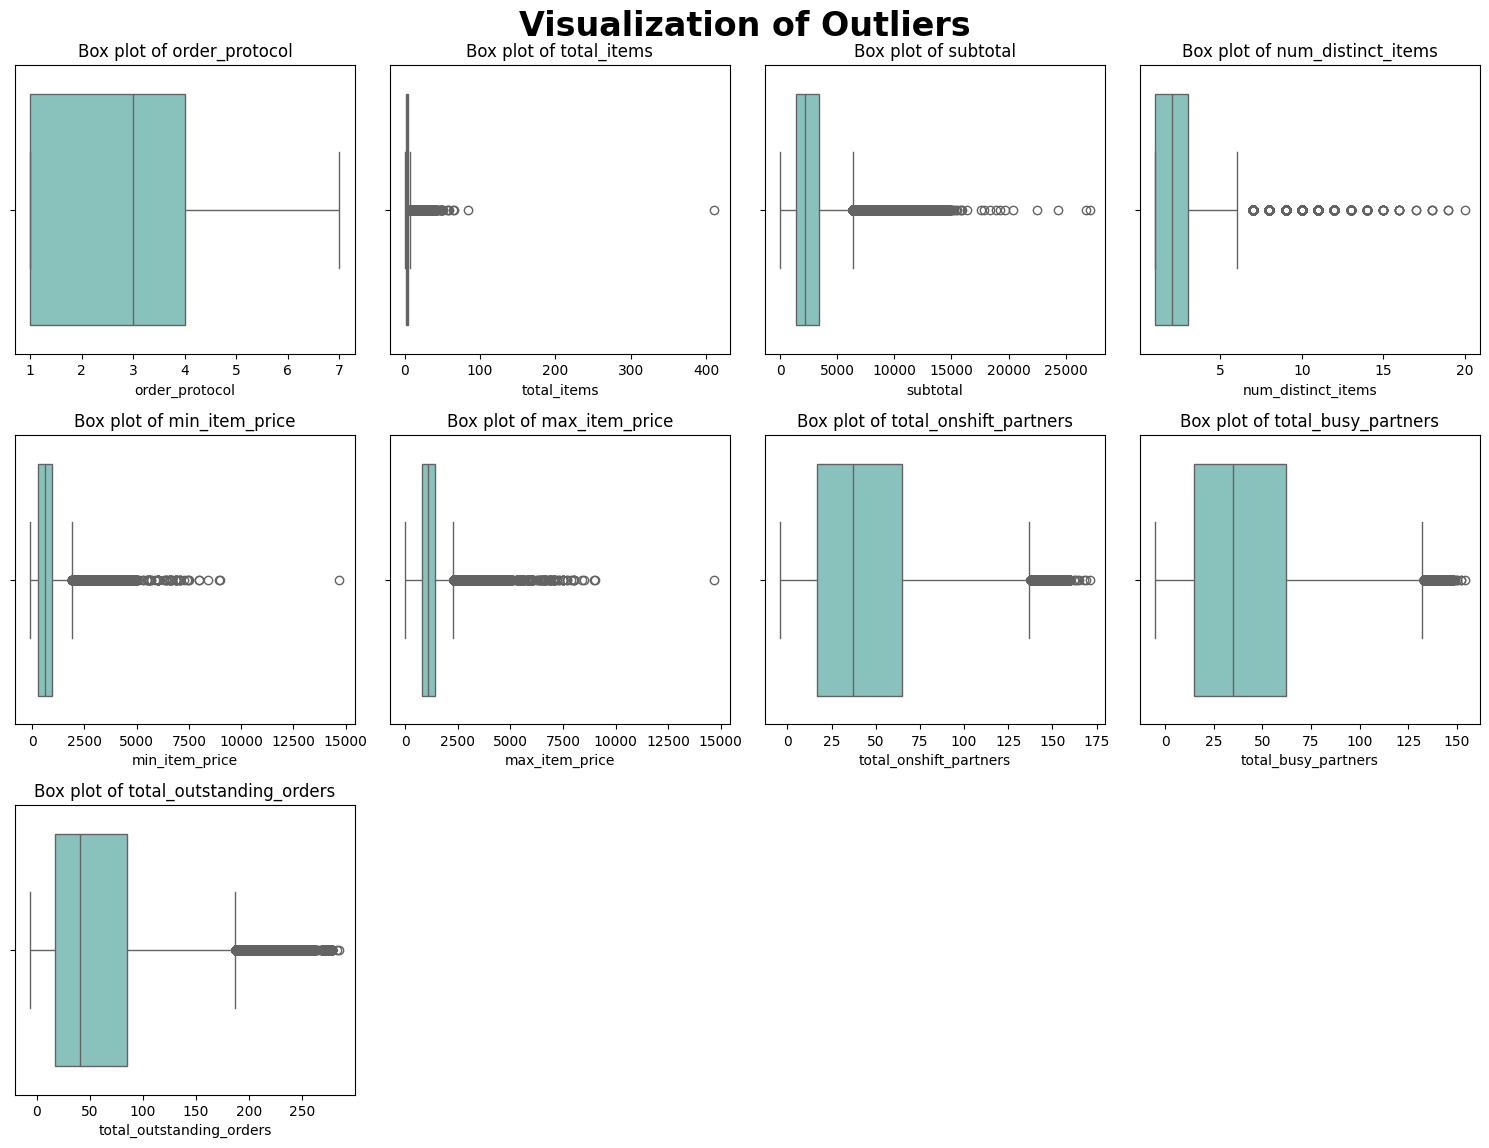

In [18]:
# function call for outlier detection
outlier_detection(df.select_dtypes(['int','float']))

In [19]:
# checking for store value counts
store_category = df['store_primary_category'].value_counts().sort_values(ascending=False).reset_index()
store_category

,store_primary_category,count
0,american,19399
1,pizza,17320
2,mexican,17098
3,burger,10958
4,sandwich,10059
...,...,...
69,lebanese,9
70,indonesian,2
71,belgian,2
72,chocolate,1


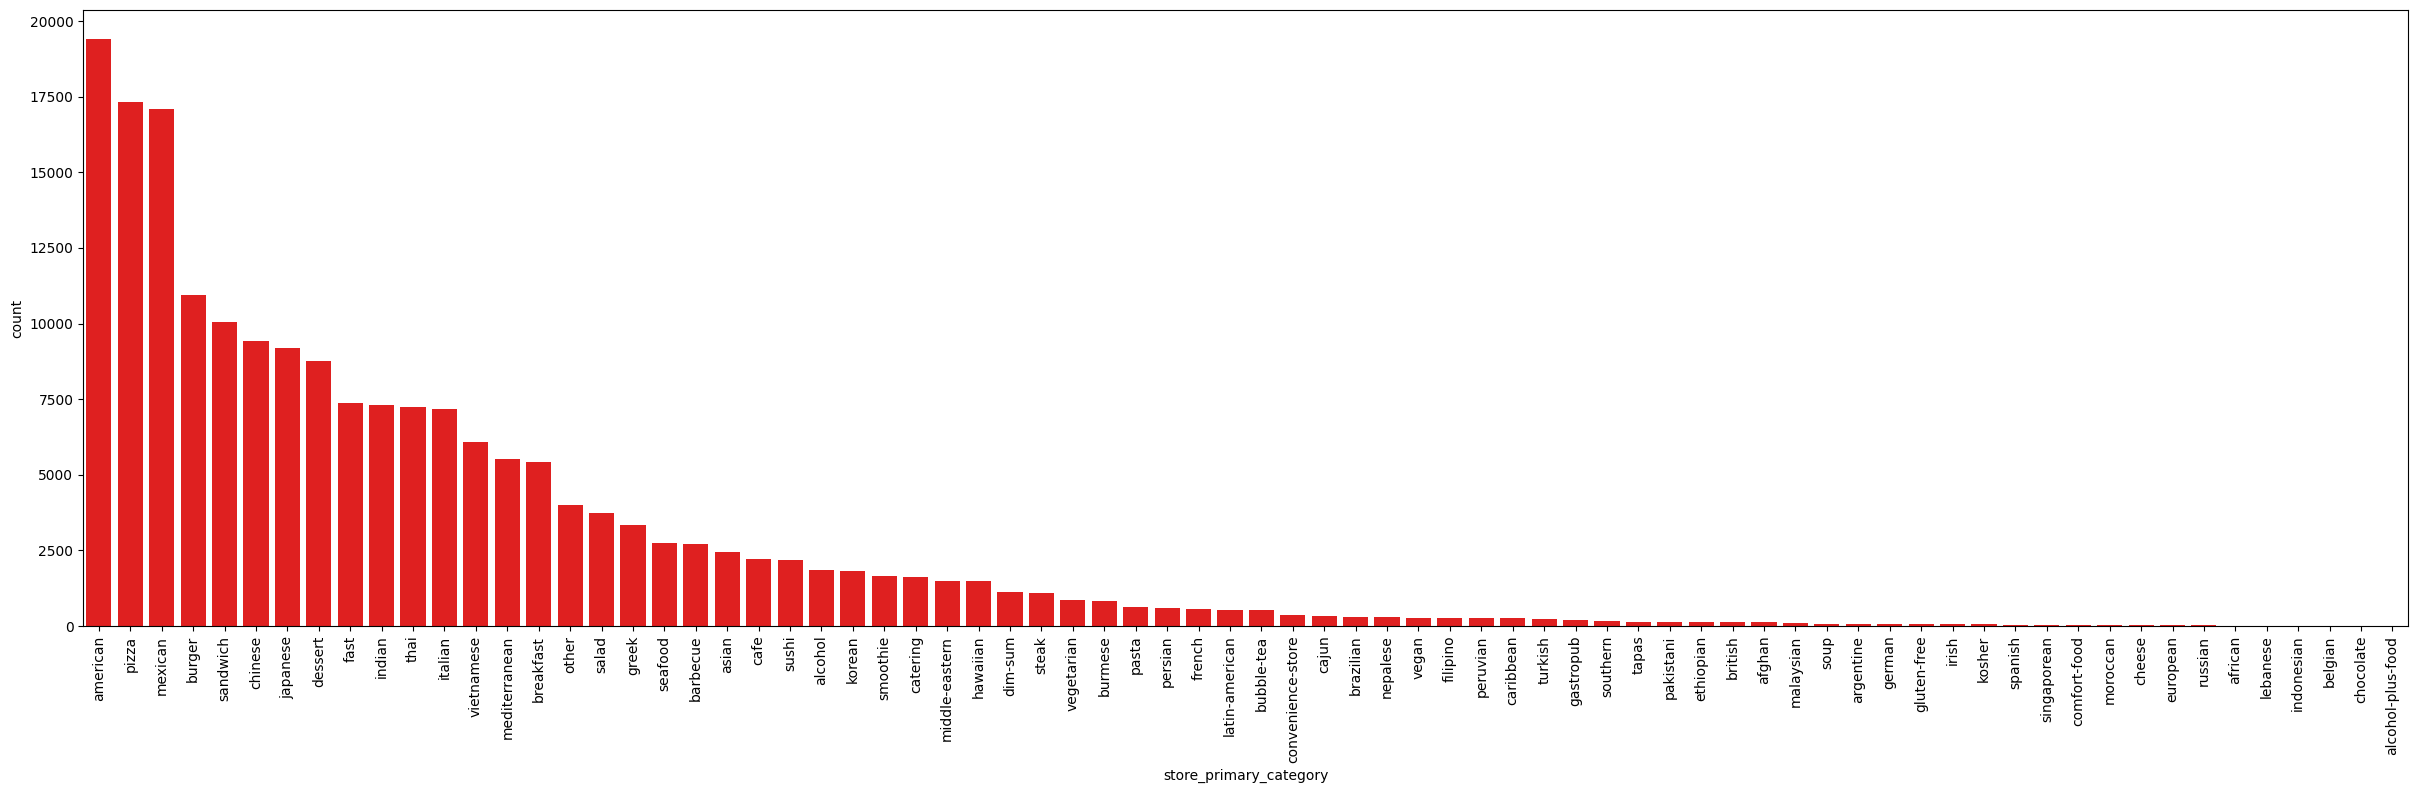

In [20]:
plt.figure(figsize=(30,8))
sns.barplot(x=store_category['store_primary_category'], y=store_category['count'], color='red')
plt.xticks(rotation=90)
plt.show()


## 2. Data preprocessing and feature engineering

### Creating the target column

In [21]:
# converting object datatype into datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [22]:
# checking the attributes after converting
df[['created_at','actual_delivery_time']].head()

,created_at,actual_delivery_time
0,2015-02-06 22:24:17,2015-02-06 23:27:16
1,2015-02-10 21:49:25,2015-02-10 22:56:29
8,2015-02-16 00:11:35,2015-02-16 00:38:01
14,2015-02-12 03:36:46,2015-02-12 04:14:39
15,2015-01-27 02:12:36,2015-01-27 03:02:24


In [23]:
# checking for their datatype
print('Column Name             DataType')
print('-'*40)
print(df[['created_at','actual_delivery_time']].dtypes)

Column Name             DataType
----------------------------------------
created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


In [24]:
# creating the target attribute time taken to delivery in minutes
df['time_taken_to_deliver'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [25]:
# checking the target attribute
df['time_taken_to_deliver'].head()

,time_taken_to_deliver
0,62.983333
1,67.066667
8,26.433333
14,37.883333
15,49.800000


In [26]:
df['time_taken_to_deliver'].describe()

,time_taken_to_deliver
count,192661.000000
mean,48.464767
std,324.413946
min,1.683333
25%,35.066667
50%,44.316667
75%,56.316667
max,141947.650000


In [27]:
# checking the datatype of target attribute
print(f'Datatype of target attribute : {df["time_taken_to_deliver"].dtypes}')

Datatype of target attribute : float64


In [28]:
# extracting numerical attributes
df_numerical = df.drop(df.select_dtypes(include='object'), axis=1)

### Correlation table

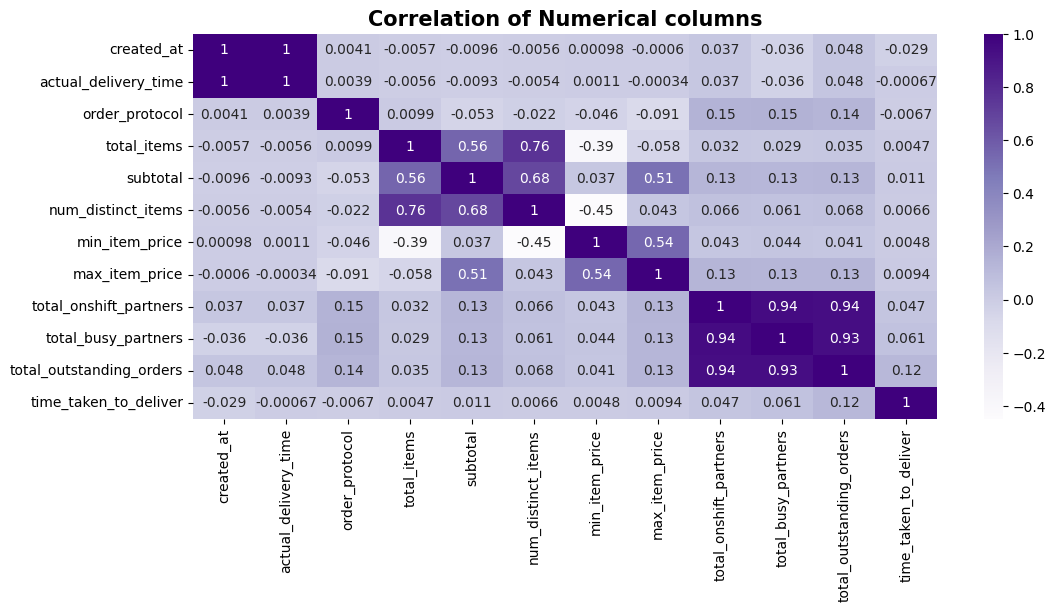

In [29]:
# visualization of correlation
plt.figure(figsize=(12,5))
sns.heatmap(df_numerical.corr(), cmap= "Purples", annot=True)
plt.title('Correlation of Numerical columns', fontsize=15, fontweight='bold')
plt.show()

### Divide dataset into features and target

In [30]:
x = df.drop('time_taken_to_deliver', axis=1)
y = df['time_taken_to_deliver']

### Split dataset into train and test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
# checking fro the shape of train and test data
print(f'Training data shape : {x_train.shape}')
print(f'Testing data shape : {x_test.shape}')

Training data shape : (154128, 13)
Testing data shape : (38533, 13)


### Missing Value Treatment

In [34]:
# creating null colom list function
def null_colom(df):
    null_col = [colom for colom in df.columns if df[colom].count() < len(df)]
    return null_col

In [35]:
# calling null_colom functing to extract null colomns
null_col = null_colom(x_train)
null_col

['order_protocol',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']

In [36]:
# dataframe of null values column and checking the null values
null_col = x_train[null_col]
null_col.isna().sum()

,0
order_protocol,390
total_onshift_partners,12532
total_busy_partners,12532
total_outstanding_orders,12532


In [37]:
# treatment of null colomn
def null_value_treatment(data, null_col):
    for colom in null_col:
      if data[colom].dtypes == 'object':
        data[colom].fillna(data[colom].mode()[0], inplace=True)
      else:
        data[colom].fillna(data[colom].median(), inplace=True)

In [38]:
# calling null_value_treatment function
null_value_treatment(x_train, null_col)

In [39]:
# checking for the null column after treatment
print('Column Name           No. of null values')
print('-'*40)
print(x_train.isna().sum())

Column Name           No. of null values
----------------------------------------
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64


#### Now, missing values treatment have been done

### c. Ourlier Treatment

In [40]:
# extract numerical column to treat outliers
num_col = x_train.drop(x_train.select_dtypes('object'), axis=1)

In [41]:
num_col.head()

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
15065,2015-02-11 05:14:58,2015-02-11 05:35:45,4.0,2,338,1,169,169,26.0,28.0,30.0
99246,2015-02-02 00:12:29,2015-02-02 00:46:25,2.0,4,3980,4,895,995,33.0,27.0,28.0
64680,2015-02-16 02:39:07,2015-02-16 03:35:53,5.0,1,1365,1,1040,1040,35.0,34.0,46.0
190777,2015-02-09 03:01:05,2015-02-09 03:58:41,4.0,3,2265,2,295,985,69.0,68.0,97.0
110398,2015-01-23 00:59:10,2015-01-23 02:29:56,2.0,3,3150,3,450,1650,38.0,38.0,59.0


In [42]:
# treatment of outliers
def outlier_treatment(df, num_col):
    for colom in num_col:

      # finding Q1, Q2 and IQR
      Q1 = df[colom].quantile(0.25)
      Q3 = df[colom].quantile(0.75)
      IQR = Q3 - Q1

      # finding upper wisker and lower wisker
      lower_wisker = Q1 - 1.5 * IQR
      upper_wisker = Q3 + 1.5 * IQR

      # capping the outlier
      df[colom] = df[colom].clip(lower=lower_wisker, upper=upper_wisker)

In [43]:
# calling outlier_treatment function to treat outliers
outlier_treatment(x_train, num_col)

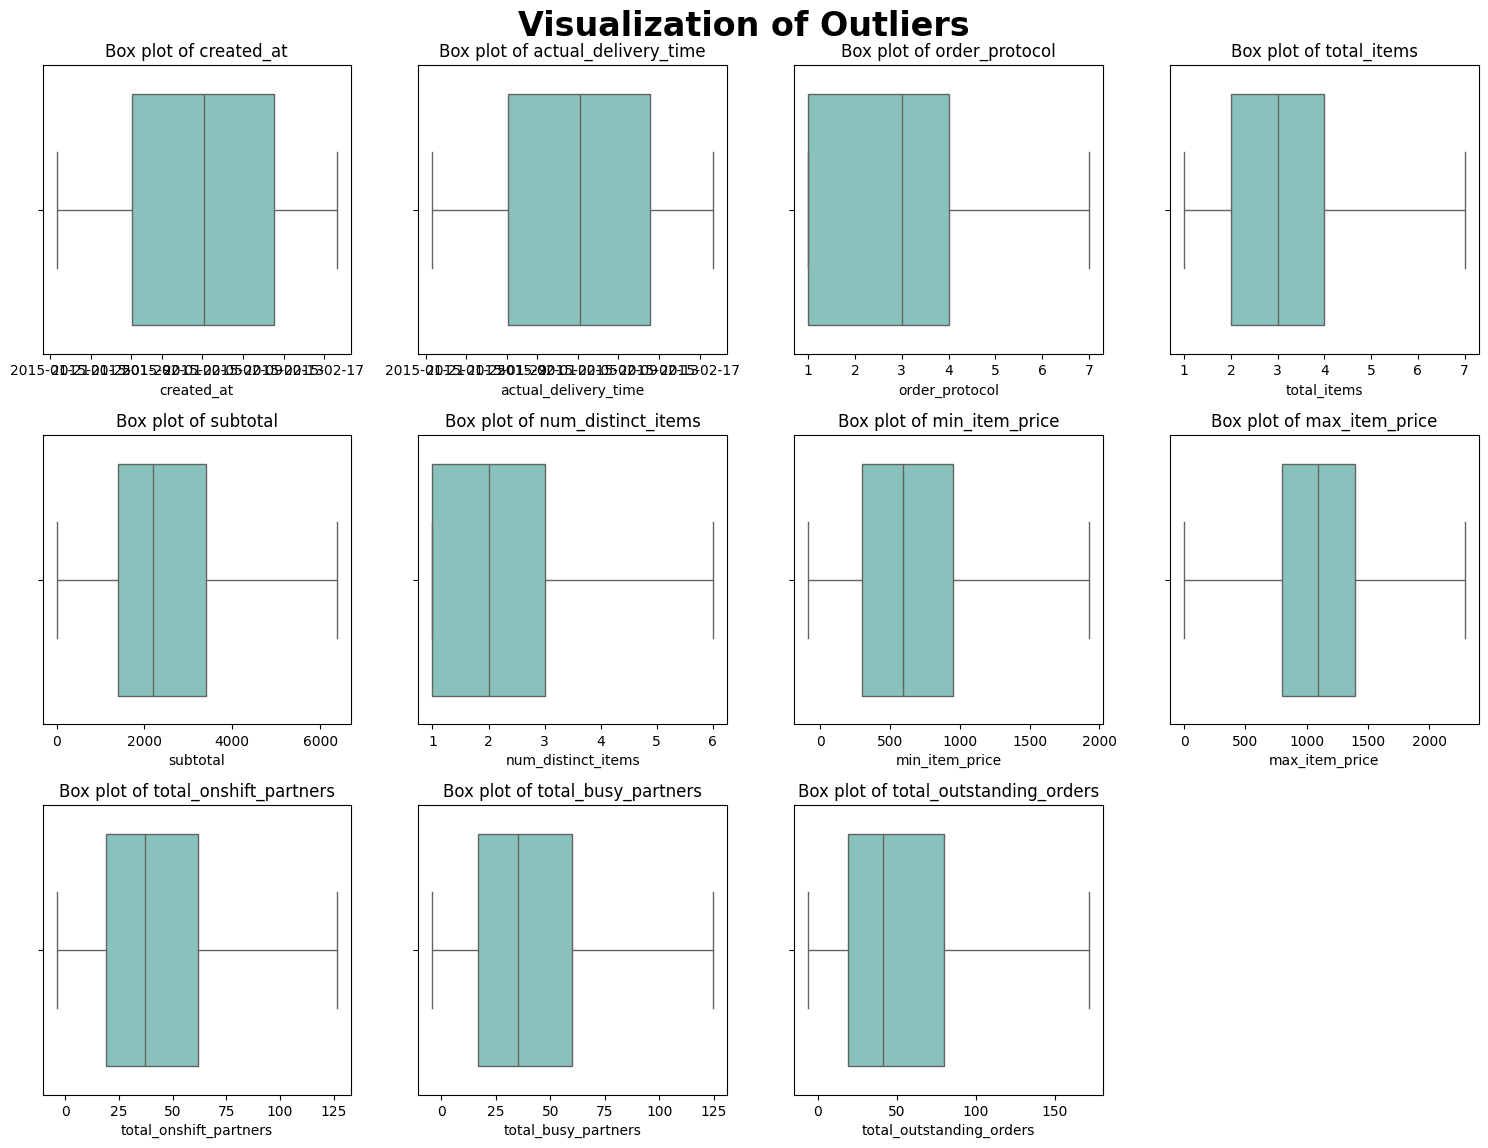

In [44]:
# visualization of oultlier after treatment
outlier_detection(x_train.drop(x_train.select_dtypes('object'), axis=1))

#### Now, all the outliers are treated

### Encoding Categorical columns

In [45]:
# extreating categorical columns to encode
cat_col = x_train.select_dtypes('object').columns
cat_col

Index(['store_id', 'store_primary_category'], dtype='object')

In [46]:
# checking for the no. of unique values in categorical column
for col in cat_col:
    print(f'Unique values in {col} column : {x_train[col].nunique()}')

Unique values in store_id column : 6434
Unique values in store_primary_category column : 74


#### Here, can see that more than 10 unique values are there in each categorical column
#### That's why using **Target Encoder** to encode the categorical columns

In [48]:
from category_encoders import TargetEncoder

In [49]:
# creating function for target encoder for categorical column
def target_encoder(df, cat_col, target):
    for column in cat_col:
        encoder = TargetEncoder(cols=[column])
        df[column] = encoder.fit_transform(df[column], target)

In [50]:
# calling target_encoder function
target_encoder(x_train, cat_col, y_train)

In [51]:
# checking for the datatype of all the attributes
print('Column Name           Type of Data')
print('-'*40)
print(x_train.dtypes)

Column Name           Type of Data
----------------------------------------
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                           float64
store_primary_category             float64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
dtype: object


#### All the categorical columns has been encoded

In [52]:
# converting datatime column into int datatype
x_train['created_at'] = x_train['created_at'].astype('int64')
x_train['actual_delivery_time'] = x_train['actual_delivery_time'].astype('int64')

### Split the data into train and validation data

In [53]:
# spliting train data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [54]:
# checking for the shape of train and validation data
print(f'Train data shape : {x_train.shape}')
print(f'Validation data shape : {x_val.shape}')

Train data shape : (123302, 13)
Validation data shape : (30826, 13)


### Scaling the train and validation data

In [55]:
# importing library
from sklearn.preprocessing import StandardScaler

In [56]:
# scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3. Model building with hyperparameter tuning using TensorFlow

In [57]:
# importing libraries to train the model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

### Vanilla Neural Network

In [59]:
model_1 = Sequential([
                    Dense(256, activation="relu", input_shape=(x_train.shape[1],), name='input_layer'),
                    Dense(128, activation="relu", name='hidden_1'),
                    Dense(64, activation="relu", name='hidden_2'),
                    Dense(1 , name='output_layer')])

In [60]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

In [61]:
# add EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True
)

In [62]:
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=100,
                    batch_size=128, callbacks=[early_stopping], verbose=1)

Epoch 1/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 597.9471 - mae: 16.9488 - val_loss: 289.2169 - val_mae: 11.3931
Epoch 2/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 290.1147 - mae: 11.5247 - val_loss: 287.1725 - val_mae: 11.6804
Epoch 3/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 286.0721 - mae: 11.3982 - val_loss: 286.2818 - val_mae: 11.3080
Epoch 4/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 275.6678 - mae: 11.3785 - val_loss: 284.8922 - val_mae: 11.3924
Epoch 5/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 278.6759 - mae: 11.3813 - val_loss: 283.1877 - val_mae: 11.5253
Epoch 6/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 277.5407 - mae: 11.3723 - val_loss: 281.8568 - val_mae: 11.1897
Epoch 7/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 270.8705 - mae: 11.2600 - val_loss: 279.6758 - val_mae: 11.2123
Epoch 8/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 269.1531 - mae: 11.2590 - val_loss: 282.9212 - val_mae: 11.1690


In [63]:
# taking prediction form model_1
train_pred_1 = model_1.predict(x_train)
val_pred_1 = model_1.predict(x_val)

3854/3854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
964/964 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [64]:
from sklearn.metrics import r2_score

In [65]:
# Calculate R² score
train_r2_1 = r2_score(y_train, train_pred_1)
val_r2_1 = r2_score(y_val, val_pred_1)
print(f"Training data R² Score: {train_r2_1:.4f}")
print(f"Validation data R² Score: {val_r2_1:.4f}")

Training data R² Score: 0.3121
Validation data R² Score: 0.2748


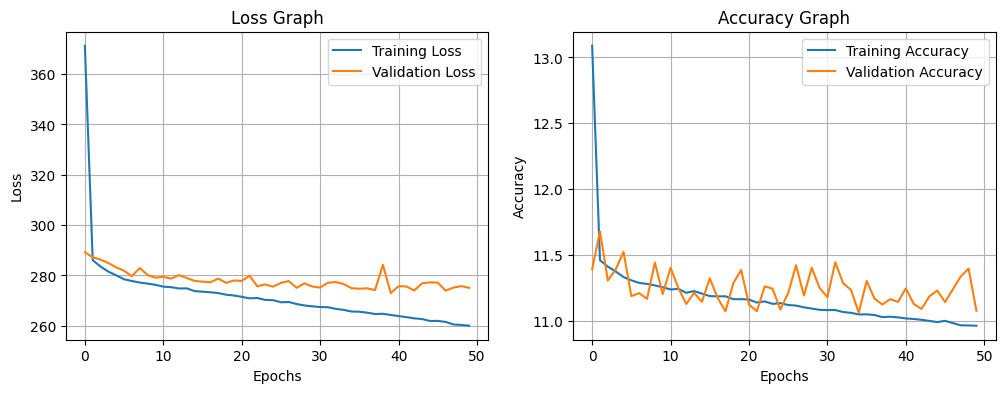

In [66]:
# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# visualization of loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()
plt.grid()

# visualization of accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.grid()

plt.show()

In [67]:
# save the model_1
with open("model_1.pkl", "wb") as file:
    pickle.dump(model_1, file)

Model_1(Vanilla Neural Network) is giving ~31% accuracy on train data and ~27% accuracy on validation data. Now, Let's try Neural Network with BatchNormalization

### Neural Network wiht BatchNormalization

In [68]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu

In [69]:
model_2 = Sequential([
                Dense(256),
                BatchNormalization(),
                Activation(relu),

                Dense(128),
                BatchNormalization(),
                Activation(relu),

                Dense(64),
                BatchNormalization(),
                Activation(relu),

                Dense(1)])

In [70]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

In [71]:
history_2 = model_2.fit(x_train, y_train, validation_data=(x_val,y_val),
                    epochs=100, batch_size=128, callbacks=[early_stopping], verbose=1)

Epoch 1/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1664.5865 - mae: 35.1923 - val_loss: 288.0549 - val_mae: 11.4529
Epoch 2/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 290.5251 - mae: 11.4703 - val_loss: 283.8372 - val_mae: 11.2652
Epoch 3/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 267.1310 - mae: 11.3043 - val_loss: 281.4566 - val_mae: 11.4509
Epoch 4/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 291.9095 - mae: 11.3725 - val_loss: 281.5597 - val_mae: 11.3612
Epoch 5/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 274.7095 - mae: 11.2528 - val_loss: 279.1517 - val_mae: 11.2683
Epoch 6/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 273.0278 - mae: 11.3127 - val_loss: 279.9738 - val_mae: 11.2172
Epoch 7/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 336.7982 - mae: 11.2748 - val_loss: 279.9293 - val_mae: 11.4335
Epoch 8/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 266.3208 - mae: 11.2480 - val_loss: 281.1899 - val_mae: 11.4204

In [72]:
# taking prediction form model_2
train_pred_2 = model_2.predict(x_train)
val_pred_2 = model_2.predict(x_val)

3854/3854 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
964/964 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [73]:
# Calculate R² score
train_r2_2 = r2_score(y_train, train_pred_2)
val_r2_2 = r2_score(y_val, val_pred_2)
print(f"Training data R² Score: {train_r2_2:.4f}")
print(f"Validation data R² Score: {val_r2_2:.4f}")

Training data R² Score: 0.9297
Validation data R² Score: 0.9227


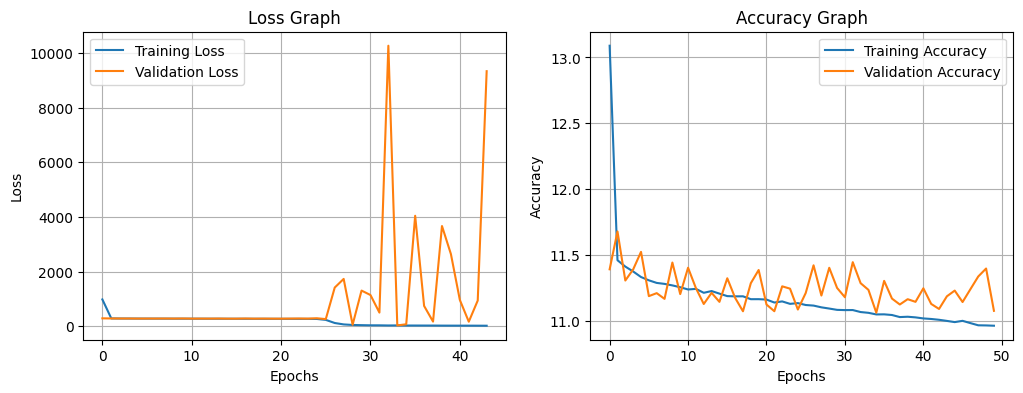

In [74]:
# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# visualization of loss plot
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()
plt.grid()

# visualization of accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.grid()

plt.show()

In [75]:
# save the model_2
with open("model_2.pkl", "wb") as file:
    pickle.dump(model_2, file)

model_2(Neural network with BatchNormalizaion giving accuracy ~0.929% on train data and ~0.922% on validation data. This model is performing very well.

### Neural Network with Droupout

In [76]:
from tensorflow.keras.layers import Dropout

In [77]:
model_3 = Sequential([
                Dense(256, activation="relu" ),
                Dropout(0.2),
                Dense(128, activation="relu"),
                Dropout(0.2),
                Dense(64, activation="relu"),
                Dense(1)])

In [78]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

In [79]:
history_3 = model_3.fit(x_train, y_train, validation_data=(x_val,y_val),
                    epochs=100, batch_size=128, callbacks=[early_stopping], verbose=1)

Epoch 1/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 614.3527 - mae: 16.9815 - val_loss: 292.7512 - val_mae: 11.6441
Epoch 2/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 319.1073 - mae: 11.8471 - val_loss: 288.3761 - val_mae: 11.6364
Epoch 3/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 318.9867 - mae: 11.8060 - val_loss: 292.4736 - val_mae: 11.2355
Epoch 4/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 314.2227 - mae: 11.7905 - val_loss: 285.9694 - val_mae: 11.2941
Epoch 5/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 311.0224 - mae: 11.7552 - val_loss: 284.3499 - val_mae: 11.2727
Epoch 6/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 307.5238 - mae: 11.7113 - val_loss: 284.9808 - val_mae: 11.2217
Epoch 7/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 287.3683 - mae: 11.6065 - val_loss: 282.8391 - val_mae: 11.2587
Epoch 8/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 284.1920 - mae: 11.5780 - val_loss: 281.1028 - val_mae: 11.3924


In [80]:
# taking prediction form model_3
train_pred_3 = model_3.predict(x_train)
val_pred_3 = model_3.predict(x_val)

3854/3854 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
964/964 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [81]:
# Calculate R² score
train_r2_3 = r2_score(y_train, train_pred_3)
val_r2_3 = r2_score(y_val, val_pred_3)
print(f"Training data R² Score: {train_r2_3:.4f}")
print(f"Validation data R² Score: {val_r2_3:.4f}")

Training data R² Score: 0.3103
Validation data R² Score: 0.2739


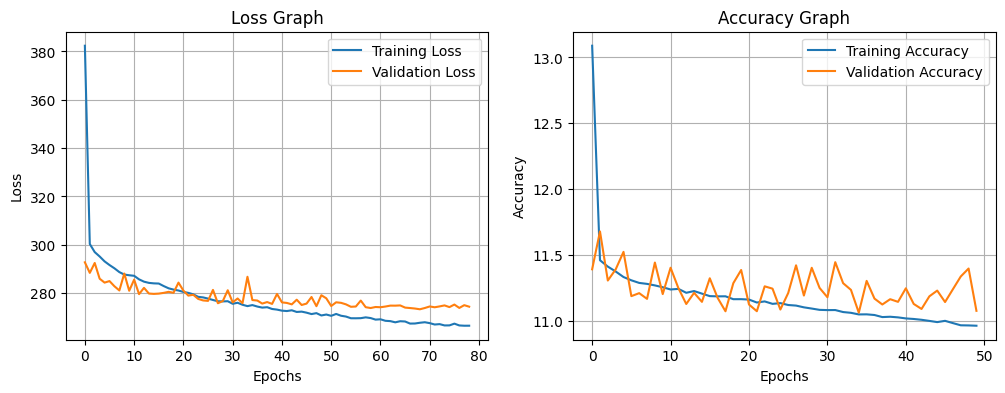

In [82]:
# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# visualization of loss plot
plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()
plt.grid()

# visualization of accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.grid()

plt.show()

In [83]:
# save the model_3
with open("model_3.pkl", "wb") as file:
    pickle.dump(model_3, file)

Model_3(Neural network with Droupout) giving accuracy ~0.31% on train data and ~0.27% on validation data

### Neural Network with BatchNormalizatin and Droupout

In [84]:
model_4 = Sequential([
                Dense(256),
                BatchNormalization(),
                Activation(relu),
                Dropout(0.2),

                Dense(128),
                BatchNormalization(),
                Activation(relu),
                Dropout(0.2),

                Dense(64 ),
                BatchNormalization(),
                Activation(relu),

                Dense(1)])

In [85]:
model_4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

In [86]:
history_4 = model_4.fit(x_train, y_train, validation_data=(x_val,y_val),
                    epochs=100, batch_size=128, callbacks=[early_stopping], verbose=1)

Epoch 1/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 1763.3534 - mae: 36.4567 - val_loss: 289.1489 - val_mae: 11.3875
Epoch 2/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 314.8412 - mae: 11.6884 - val_loss: 286.4457 - val_mae: 11.3173
Epoch 3/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 288.3468 - mae: 11.5206 - val_loss: 284.4589 - val_mae: 11.2605
Epoch 4/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 276.5552 - mae: 11.4550 - val_loss: 285.9708 - val_mae: 11.3375
Epoch 5/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 271.8584 - mae: 11.3777 - val_loss: 285.0169 - val_mae: 11.2769
Epoch 6/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 281.8774 - mae: 11.3945 - val_loss: 282.6446 - val_mae: 11.3365
Epoch 7/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 274.3580 - mae: 11.3646 - val_loss: 280.5301 - val_mae: 11.2471
Epoch 8/100
964/964 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 274.9348 - mae: 11.3205 - val_loss: 281.8188 - val_mae: 11.376

In [87]:
# taking prediction form model_4
train_pred_4 = model_4.predict(x_train)
val_pred_4 = model_4.predict(x_val)

3854/3854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
964/964 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [88]:
# Calculate R² score
train_r2_4 = r2_score(y_train, train_pred_4)
val_r2_4 = r2_score(y_val, val_pred_4)
print(f"Training data R² Score: {train_r2_4:.4f}")
print(f"Validation data R² Score: {val_r2_4:.4f}")

Training data R² Score: 0.8147
Validation data R² Score: 0.7945


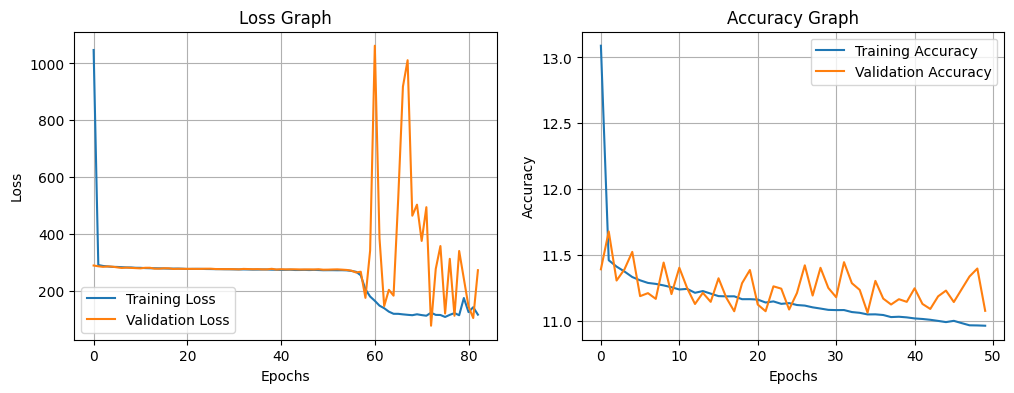

In [89]:
# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# visualization of loss plot
plt.subplot(1, 2, 1)
plt.plot(history_4.history['loss'], label='Training Loss')
plt.plot(history_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()
plt.grid()

# visualization of accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.grid()

plt.show()

In [90]:
# save the model_4
with open("model_4.pkl", "wb") as file:
    pickle.dump(model_4, file)

# Test Data Preperation

In [91]:
x_test.head()

,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
9738,2015-02-06 19:44:38,2015-02-06 20:46:28,16f86429ff6ff5a9ea9b2bd590744243,korean,3.0,7,3650,4,150,800,7.0,3.0,3.0
167063,2015-02-08 01:38:40,2015-02-08 02:30:30,7c5feb07041100d3cf5e2e86613f8d87,mexican,1.0,1,899,1,799,799,0.0,0.0,0.0
187903,2015-01-30 02:36:27,2015-01-30 03:16:34,d947bf06a885db0d477d707121934ff8,sushi,5.0,7,7300,7,650,1650,109.0,74.0,131.0
89,2015-02-07 23:45:40,2015-02-08 00:37:08,a8aa681aaa4588a8dbd3b42b26d59a1a,mexican,1.0,2,1150,2,350,800,17.0,13.0,13.0
104148,2015-01-26 01:33:13,2015-01-26 02:11:17,d9f53a87e571214d24718690a39f67e9,american,1.0,4,5250,3,1050,1400,31.0,47.0,24.0


In [92]:
# calling null_colom functing to extract null colomns from test data
nul_col = null_colom(x_test)
nul_col

['order_protocol',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']

In [93]:
# dataframe of null values column and checking the null values of test data
nul_col = x_test[nul_col]
nul_col.isna().sum()

,0
order_protocol,98
total_onshift_partners,3185
total_busy_partners,3185
total_outstanding_orders,3185


In [94]:
# calling null_value_treatment function for test data
null_value_treatment(x_test, nul_col)

In [95]:
# checking for the null column after treatment of test data
print('Column Name           No. of null values')
print('-'*40)
print(x_test.isna().sum())

Column Name           No. of null values
----------------------------------------
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64


In [97]:
# extract numerical column to treat outliers
num_col = x_test.drop(x_test.select_dtypes('object'), axis=1)

In [98]:
# calling outlier_treatment function to treat outliers of test data
outlier_treatment(x_test, num_col)

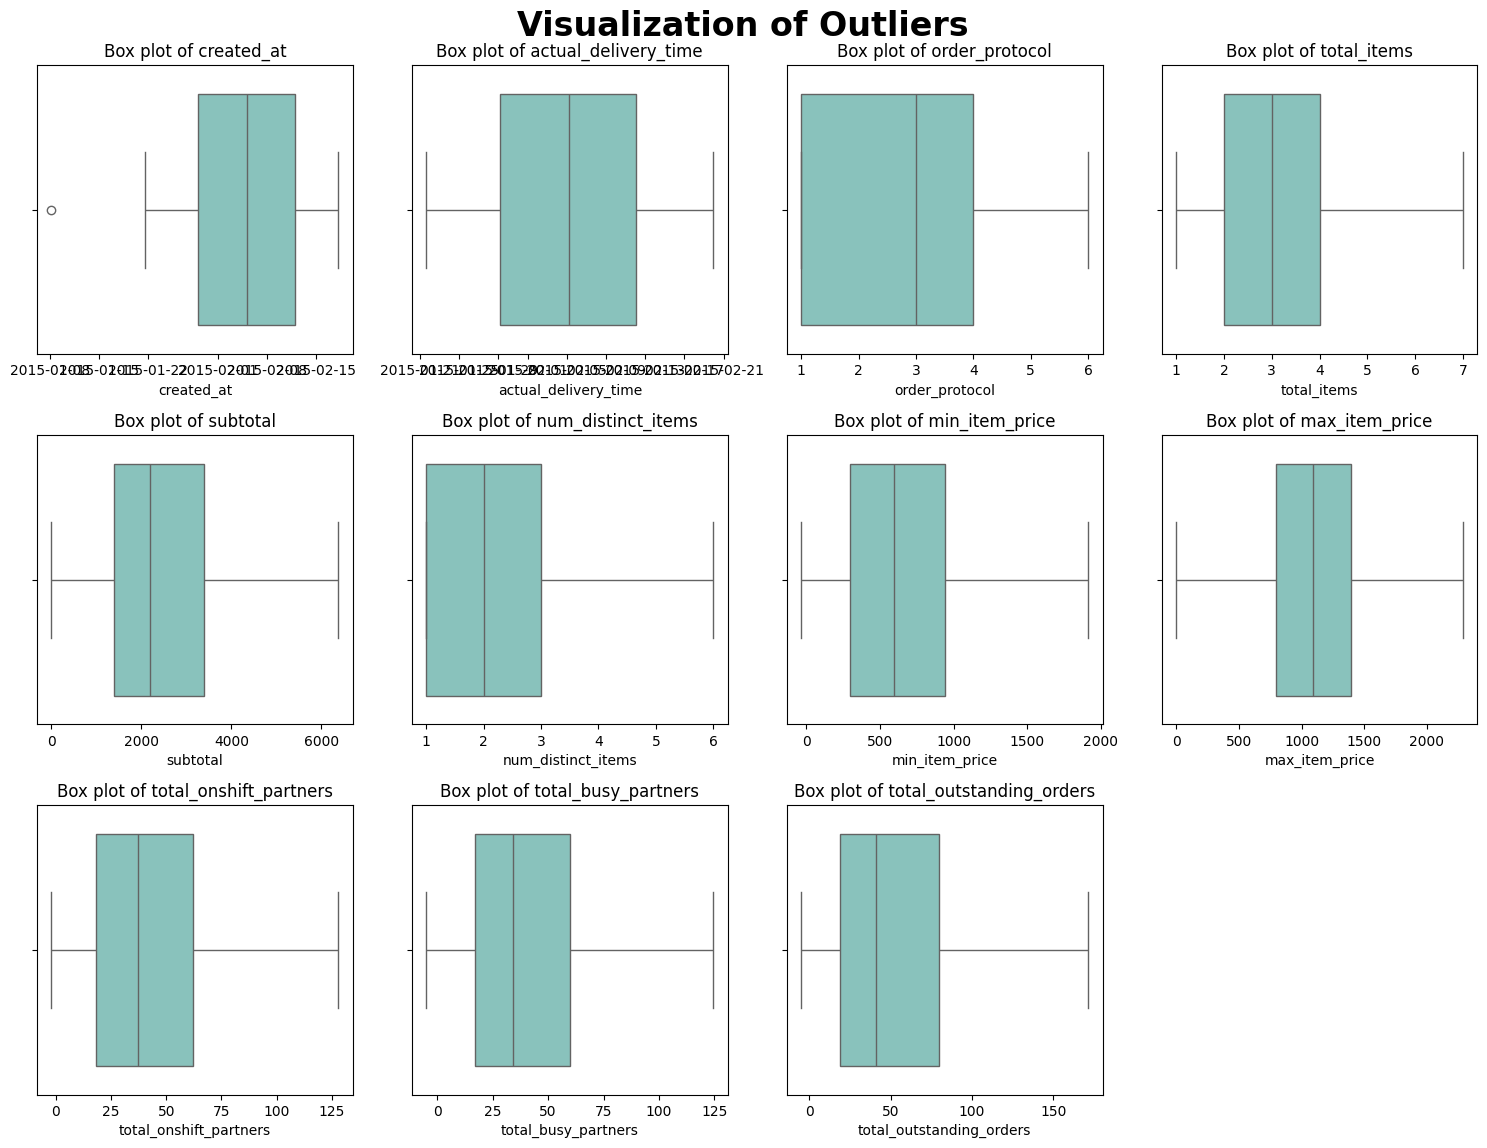

In [99]:
# visualization of test data oultlier after treatment
outlier_detection(x_test.drop(x_test.select_dtypes('object'), axis=1))

In [100]:
# extreating categorical columns to encode
cat_col = x_test.select_dtypes('object').columns
cat_col

Index(['store_id', 'store_primary_category'], dtype='object')

In [101]:
# calling target_encoder function to encode categorical columns of test data
target_encoder(x_test, cat_col, y_test)

In [102]:
# checking for the datatype of all the attributes
# checking data types of all attributes
print('Column Name           Type of Data')
print('-'*40)
print(x_test.dtypes)

Column Name           Type of Data
----------------------------------------
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                           float64
store_primary_category             float64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                     float64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
dtype: object


In [103]:
# converting datatime column into int datatype
x_test['created_at'] = x_test['created_at'].astype('int64')
x_test['actual_delivery_time'] = x_test['actual_delivery_time'].astype('int64')

In [104]:
# scaling the test data
x_test = scaler.transform(x_test)

## Taking prediction of test data with all the models

In [109]:
# Load the model_1
with open("model_1.pkl", "rb") as file:
    model_1 = pickle.load(file)

# prediction from model 1
test_pred_1 = model_1.predict(x_test)
test_r2_1 = r2_score(y_test, test_pred_1)
print(f'Test prediction from model 1 : {round(test_r2_1,3)}')

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test prediction from model 1 : 0.13


In [113]:
# Load the model_2
with open("model_2.pkl", "rb") as file:
    model_2 = pickle.load(file)

# prediction from model_2
test_pred_2 = model_2.predict(x_test)
test_r2_2 = r2_score(y_test, test_pred_2)
print(f'Test prediction from model 2 : {round(test_r2_2,4)}')

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test prediction from model 2 : 0.2832


In [114]:
# Load the model_3
with open("model_3.pkl", "rb") as file:
    model_3 = pickle.load(file)

# prediction from model_3
test_pred_3 = model_3.predict(x_test)
test_r2_3 = r2_score(y_test, test_pred_3)
print(f'Test prediction from model 3 : {round(test_r2_3,4)}')

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test prediction from model 3 : 0.1602


In [115]:
# Load the model_4
with open("model_4.pkl", "rb") as file:
    model_4 = pickle.load(file)

# prediction from model_4
test_pred_4 = model_4.predict(x_test)
test_r2_4 = r2_score(y_test, test_pred_4)
print(f'Test prediction from model 4 : {round(test_r2_4,4)}')

1205/1205 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Test prediction from model 4 : 0.226


## Evalution

In [119]:
# create datafram of train, validation and test score
evalutation = pd.DataFrame({
    'Model' : ['model_1', 'model_2', 'model_3', 'model_4'],
    'Model_Name' : ['vanilla NN','NN with BatchNorm', 'NN with Droupout', 'NN with BatchNorm & Droupout'],
    'Train_r2_score' : [train_r2_1,train_r2_2, train_r2_3, train_r2_4],
    'Validation_r2_score' : [val_r2_1, val_r2_2, val_r2_3, val_r2_4],
    'Test_r2_score' : [test_r2_1, test_r2_2, test_r2_3, test_r2_4]
})

In [120]:
evalutation

,Model,Model_Name,Train_r2_score,Validation_r2_score,Test_r2_score
0,model_1,vanilla NN,0.312139,0.274848,0.129567
1,model_2,NN with BatchNorm,0.929739,0.922671,0.283206
2,model_3,NN with Droupout,0.310261,0.273900,0.160165
3,model_4,NN with BatchNorm & Droupout,0.814671,0.794489,0.225983


Model_2 and Model_4 is performing very well in train and validation data but can see some overfitting on test data